## Support Vector Regression on Admission Dataset

In [130]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


## Data ingestion

In [12]:
df = pd.read_csv(r"G:\Udemy\DATA SCIENCE ineuron\Resources\Admision prediction.csv")
df.head()

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [13]:
df.columns

Index(['Unnamed: 0', 'Serial No.', 'GRE Score', 'TOEFL Score',
       'University Rating', 'SOP', 'LOR', 'CGPA', 'Research',
       'Chance of Admit'],
      dtype='object')

In [15]:
df.drop(['Unnamed: 0','Serial No.'],axis = 1,inplace= True)

In [17]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


### Rename the columns

In [82]:
df.rename(columns = {"GRE Score":"GRE_Score", "TOEFL Score":"TOEFL_Score","University Rating" : "University_Rating", "Chance_of_Admit'":"Chance_of_Admit"},inplace = True)

In [83]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          485 non-null    float64
 1   TOEFL_Score        490 non-null    float64
 2   University_Rating  485 non-null    float64
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance_of_Admit'   500 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 31.4 KB


In [71]:
df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit'
count,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [72]:
df.shape

(500, 8)

### Check the duplcate values

In [73]:
df[df.duplicated()]

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit'


### Checking For Null Values

In [74]:
df.isna().sum()

GRE_Score            15
TOEFL_Score          10
University_Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance_of_Admit'      0
dtype: int64

### Fill the null values with the mean

In [94]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [95]:
df['GRE_Score'] = df['GRE_Score'].fillna(round(df['GRE_Score'].mean()))
df['TOEFL_Score'] = df['TOEFL_Score'].fillna(round(df['TOEFL_Score'].mean()))
df['University_Rating'] = df['University_Rating'].fillna(round(df['University_Rating'].mean()))

In [96]:
df.isna().sum()

GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

### Check the outliers

### Box plot

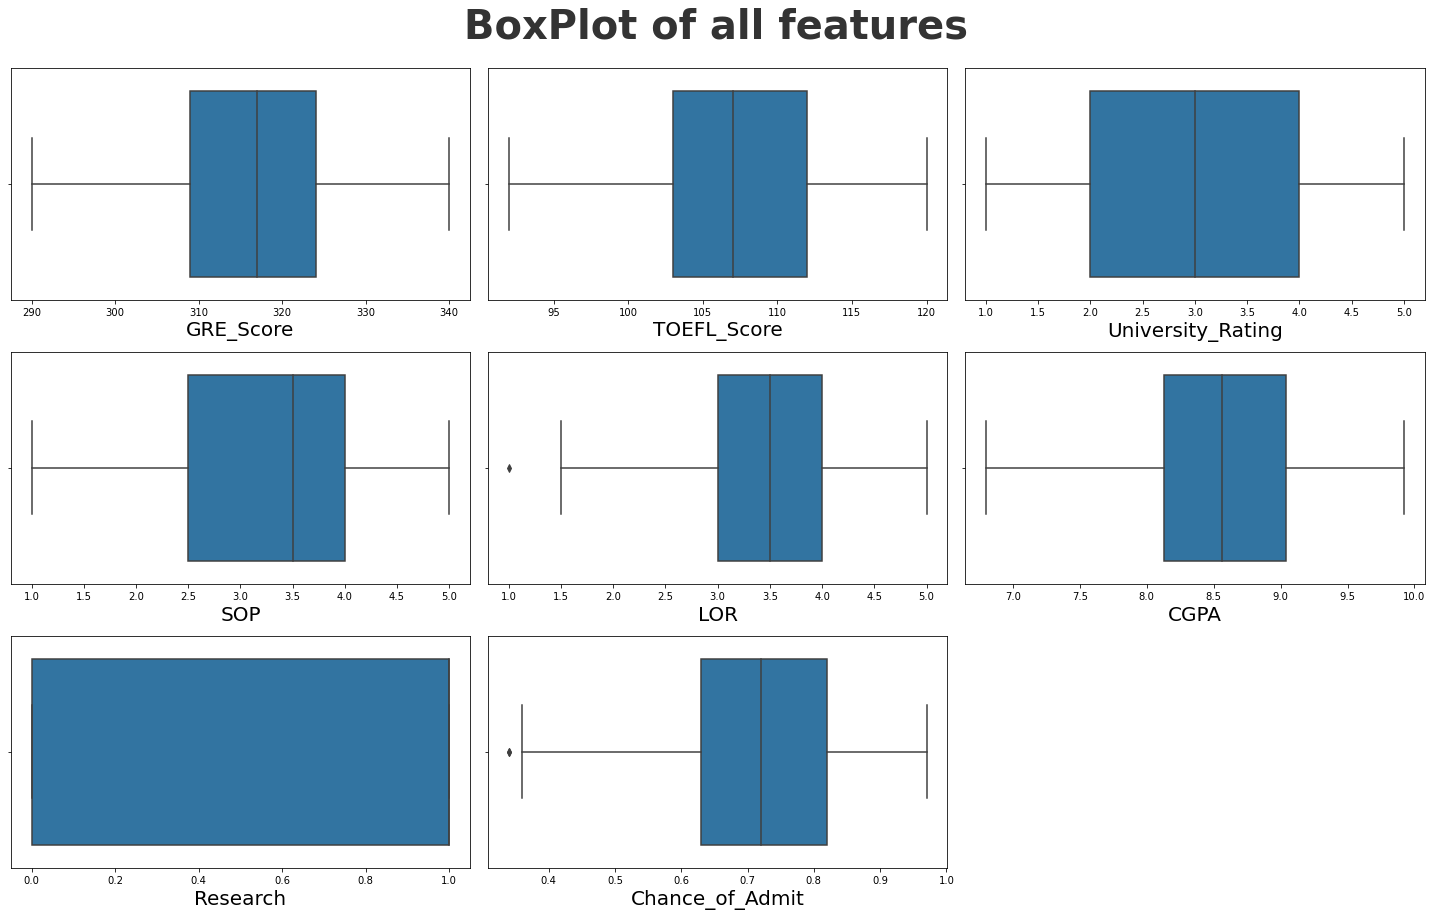

In [97]:
plt.figure(figsize = (20,20))
plt.suptitle('BoxPlot of all features', fontsize = 40, fontweight = "bold", alpha = 0.8, y = 1.)

for i in range(0, len(df.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x= df[df.columns[i]], data = df)
    plt.xlabel(df.columns[i],fontsize = 20)
    #plt.ylabel("Classes")
    #plt.title("{} .format(data.columns[i]))
    plt.tight_layout()

### Obeservation
Very Few outliers are present in the dataset, this will not affect our model so we do not handle it 

## Graphical Analysis (DATA Visualization)

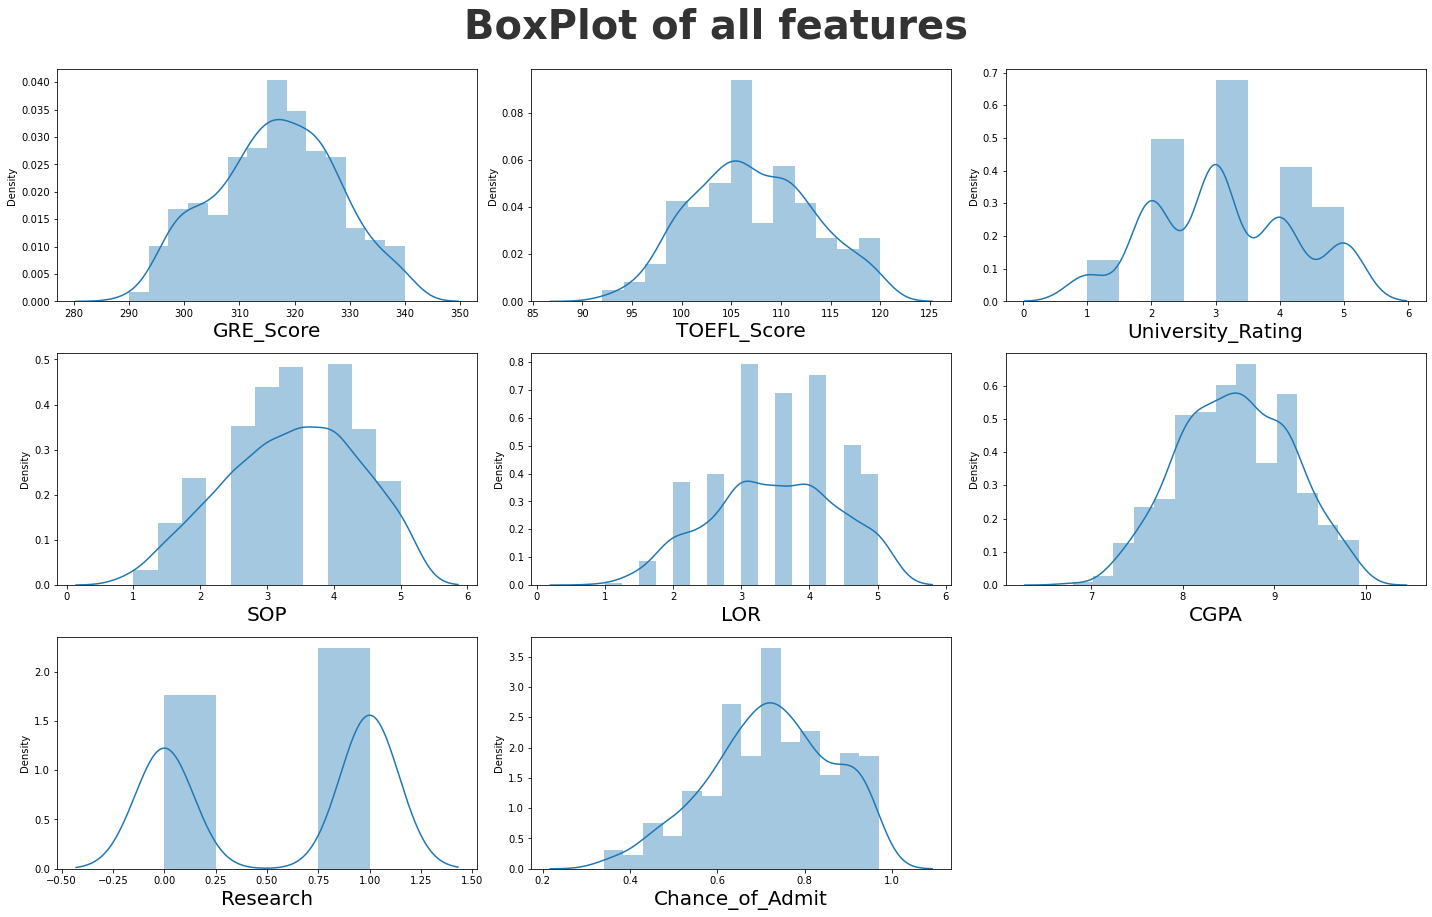

In [101]:
plt.figure(figsize = (20,20))
plt.suptitle('BoxPlot of all features', fontsize = 40, fontweight = "bold", alpha = 0.8, y = 1.)

for i in range(0, len(df.columns)):
    plt.subplot(5,3,i+1)
    sns.distplot(x= df[df.columns[i]])
    plt.xlabel(df.columns[i],fontsize = 20)
    #plt.ylabel("Classes")
    #plt.title("{} .format(data.columns[i]))
    plt.tight_layout()

### Correlation

In [102]:
df.corr()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
GRE_Score,1.000000,0.819885,0.623467,0.608349,0.528105,0.818344,0.544756,0.802321
TOEFL_Score,0.819885,1.000000,0.644189,0.642976,0.535500,0.805547,0.464858,0.786543
University_Rating,0.623467,0.644189,1.000000,0.713657,0.606949,0.697704,0.424966,0.681482
SOP,0.608349,0.642976,0.713657,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.528105,0.535500,0.606949,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.818344,0.805547,0.697704,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.544756,0.464858,0.424966,0.408116,0.372526,0.501311,1.000000,0.545871
Chance_of_Admit,0.802321,0.786543,0.681482,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot:>

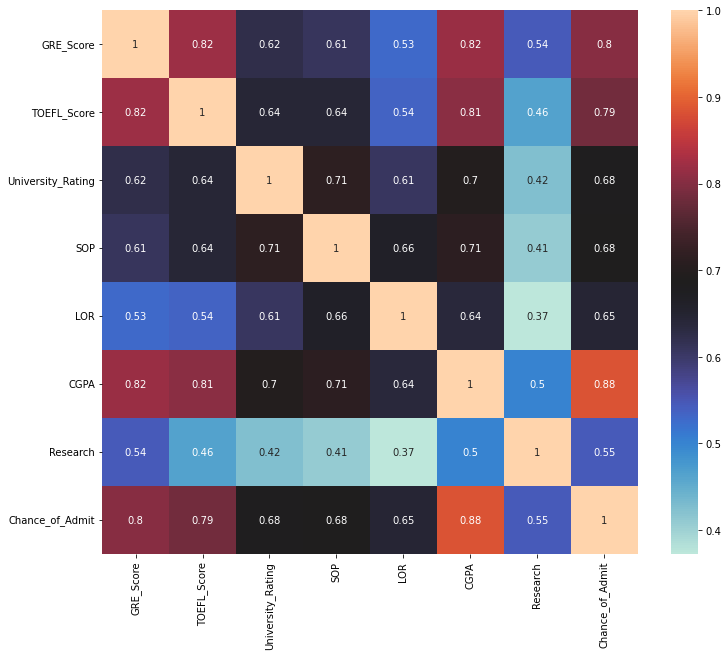

In [112]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(),annot = True, cmap='icefire')

### Splitting data into independet and dependent features

In [125]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [127]:
X.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,317.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0


In [128]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance_of_Admit, dtype: float64

## Train Test split

In [132]:
## random state train test split ....
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=10)

In [134]:
X_train.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
324,315.0,104.0,3.0,3.0,2.5,8.33,0
252,318.0,100.0,2.0,2.5,3.5,8.54,1
441,332.0,112.0,1.0,1.5,3.0,8.66,1
427,310.0,101.0,3.0,3.5,5.0,8.65,1
70,317.0,118.0,5.0,5.0,5.0,9.64,1


In [135]:
X_train.shape,y_train.shape

((375, 7), (375,))

In [181]:
X_test.shape,y_test.shape

((125, 7), (125,))

### StandardScaler

In [182]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [183]:
X_train =scaler.fit_transform(X_train)
X_train

array([[-0.11576237, -0.5064383 , -0.05434817, ..., -1.00222248,
        -0.36783128, -1.13427746],
       [ 0.15165583, -1.16643608, -0.94045957, ...,  0.07005549,
        -0.0297116 ,  0.8816185 ],
       [ 1.39960745,  0.81355726, -1.82657097, ..., -0.46608349,
         0.16349965,  0.8816185 ],
       ...,
       [ 0.06251643, -0.17643941, -0.05434817, ..., -0.46608349,
        -1.07627251,  0.8816185 ],
       [-1.45285339, -1.16643608, -0.05434817, ..., -0.46608349,
         0.16349965,  0.8816185 ],
       [-0.29404117, -0.83643719, -0.05434817, ..., -1.00222248,
         0.19570152, -1.13427746]])

In [184]:
X_test=scaler.transform(X_test)
X_test

array([[ 3.32000000e+02,  1.16000000e+02,  5.00000000e+00,
         5.00000000e+00,  5.00000000e+00,  9.28000000e+00,
         1.00000000e+00],
       [ 3.25000000e+02,  1.14000000e+02,  5.00000000e+00,
         4.00000000e+00,  5.00000000e+00,  9.46000000e+00,
         1.00000000e+00],
       [ 3.26000000e+02,  1.08000000e+02,  3.00000000e+00,
         3.00000000e+00,  3.50000000e+00,  8.89000000e+00,
        -1.17239551e-16],
       [ 3.24000000e+02,  1.11000000e+02,  5.00000000e+00,
         4.50000000e+00,  4.00000000e+00,  9.16000000e+00,
         1.00000000e+00],
       [ 3.03000000e+02,  1.05000000e+02,  5.00000000e+00,
         5.00000000e+00,  4.50000000e+00,  8.65000000e+00,
        -1.17239551e-16],
       [ 3.20000000e+02,  1.04000000e+02,  3.00000000e+00,
         3.00000000e+00,  3.50000000e+00,  8.74000000e+00,
         1.00000000e+00],
       [ 3.12000000e+02,  1.05000000e+02,  2.00000000e+00,
         2.00000000e+00,  2.50000000e+00,  8.45000000e+00,
        -1.1723955

## SVR Model

In [185]:
from sklearn.svm import SVR
regression = SVR(kernel='rbf')
regression.fit(X_train,y_train)

SVR()

In [186]:
y_pred = regression.predict(X_test)
y_pred

array([0.66227707, 0.66227707, 0.66227707, 0.66227707, 0.66227707,
       0.66227707, 0.66227707, 0.66227707, 0.66227707, 0.66227707,
       0.66227707, 0.66227707, 0.66227707, 0.66227707, 0.66227707,
       0.66227707, 0.66227707, 0.66227707, 0.66227707, 0.66227707,
       0.66227707, 0.66227707, 0.66227707, 0.66227707, 0.66227707,
       0.66227707, 0.66227707, 0.66227707, 0.66227707, 0.66227707,
       0.66227707, 0.66227707, 0.66227707, 0.66227707, 0.66227707,
       0.66227707, 0.66227707, 0.66227707, 0.66227707, 0.66227707,
       0.66227707, 0.66227707, 0.66227707, 0.66227707, 0.66227707,
       0.66227707, 0.66227707, 0.66227707, 0.66227707, 0.66227707,
       0.66227707, 0.66227707, 0.66227707, 0.66227707, 0.66227707,
       0.66227707, 0.66227707, 0.66227707, 0.66227707, 0.66227707,
       0.66227707, 0.66227707, 0.66227707, 0.66227707, 0.66227707,
       0.66227707, 0.66227707, 0.66227707, 0.66227707, 0.66227707,
       0.66227707, 0.66227707, 0.66227707, 0.66227707, 0.66227

## Peformance Matrics

In [187]:
# Performance matrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [188]:
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.02210420198288215
0.12255452344162897


## R-Square & Adjusted R-Square

In [189]:
from sklearn.metrics import r2_score
score = r2_score(y_test , y_pred)
print(score)

-0.2753588917875338


In [190]:
## Adjuste r2 
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-0.3516624152278136